# 🧙 Shakespeare Text Generator

In [1]:
import numpy as np
import re

### 1. Data Preprocessing
* Clean and prepare the data:

In [2]:
with open('/kaggle/input/shakespeare-plays/alllines.txt', 'r', encoding='utf-8') as f:
    text = f.read().lower()

# Remove special characters and digits, keep only letters and spaces
text = re.sub(r'[^a-z\s]', '', text)

In [3]:
print(f"Total characters in corpus: {len(text)}")

Total characters in corpus: 4165646


### 2. Character-level tokenization:

In [4]:
chars = sorted(list(set(text)))
char_to_idx = {char: idx for idx, char in enumerate(chars)}
idx_to_char = {idx: char for idx, char in enumerate(chars)}

In [5]:
vocab_size = len(chars)
print(f"Total Characters: {vocab_size}")

Total Characters: 29


### 3. Prepare sequences

In [ ]:
from keras.utils import to_categorical

In [7]:
SEQ_LEN = 60
step = 1
X = []
y = []

for i in range(0, len(text) - SEQ_LEN, step):
    X.append([char_to_idx[c] for c in text[i: i + SEQ_LEN]])
    y.append(char_to_idx[text[i + SEQ_LEN]])

X = np.array(X)
y = to_categorical(y, num_classes=vocab_size)

print("Total Sequences:", len(X))

Total Sequences: 4165586


In [8]:
y.shape

(4165586, 29)

In [9]:
X.shape

(4165586, 60)

### LSTM Model Architecture

In [10]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding

In [11]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=64)) 
model.add(LSTM(150, return_sequences=True))
model.add(LSTM(150))
model.add(Dense(vocab_size, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.build(input_shape=(None, SEQ_LEN))
model.summary()

I0000 00:00:1751025698.115694      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1751025698.116414      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 60, 64)              │           1,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 60, 150)             │         129,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 150)                 │         180,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 29)                  │           4,379 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,835 (1.20 MB)

 Trainable params: 315,835 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(X, y, batch_size=128, epochs=10)

Epoch 1/10


I0000 00:00:1751025710.028006     101 cuda_dnn.cc:529] Loaded cuDNN version 90300


32544/32544 ━━━━━━━━━━━━━━━━━━━━ 424s 13ms/step - accuracy: 0.4610 - loss: 1.7511
Epoch 2/10
32544/32544 ━━━━━━━━━━━━━━━━━━━━ 423s 13ms/step - accuracy: 0.5550 - loss: 1.3966
Epoch 3/10
32544/32544 ━━━━━━━━━━━━━━━━━━━━ 424s 13ms/step - accuracy: 0.5646 - loss: 1.3585
Epoch 4/10
32544/32544 ━━━━━━━━━━━━━━━━━━━━ 424s 13ms/step - accuracy: 0.5697 - loss: 1.3390
Epoch 5/10
32544/32544 ━━━━━━━━━━━━━━━━━━━━ 422s 13ms/step - accuracy: 0.5728 - loss: 1.3294
Epoch 6/10
32544/32544 ━━━━━━━━━━━━━━━━━━━━ 421s 13ms/step - accuracy: 0.5756 - loss: 1.3193
Epoch 7/10
32544/32544 ━━━━━━━━━━━━━━━━━━━━ 422s 13ms/step - accuracy: 0.5770 - loss: 1.3132
Epoch 8/10
32544/32544 ━━━━━━━━━━━━━━━━━━━━ 422s 13ms/step - accuracy: 0.5772 - loss: 1.3116
Epoch 9/10
32544/32544 ━━━━━━━━━━━━━━━━━━━━ 423s 13ms/step - accuracy: 0.5787 - loss: 1.3081
Epoch 10/10
32544/32544 ━━━━━━━━━━━━━━━━━━━━ 423s 13ms/step - accuracy: 0.5788 - loss: 1.3060


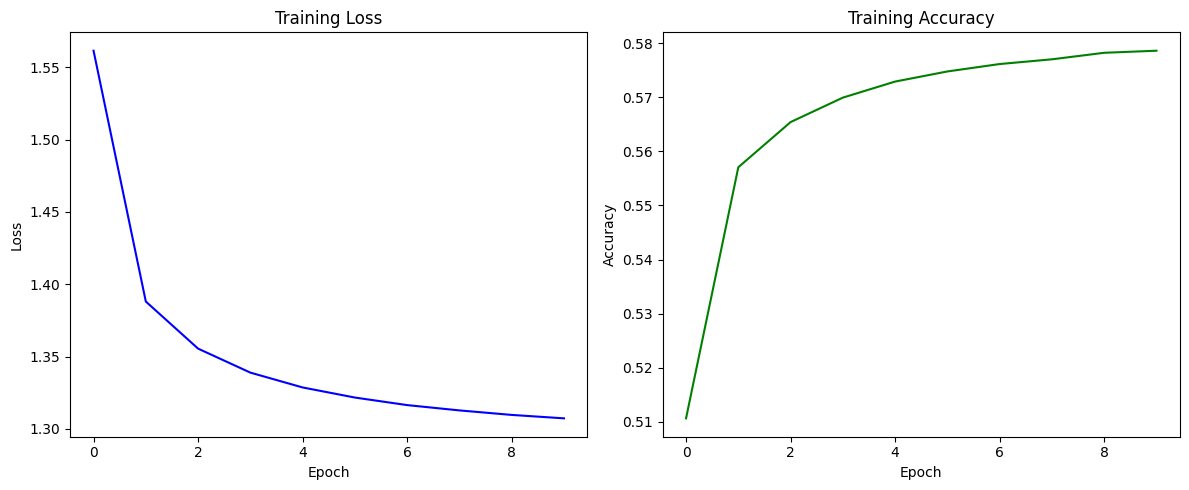

In [19]:
import matplotlib.pyplot as plt

# Plot training loss
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], color='blue')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='green')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

### Text Generation Function

In [14]:
def generate_text(seed, length=300, temperature=1.0):
    result = seed
    for _ in range(length):
        input_seq = [char_to_idx.get(c, 0) for c in result[-SEQ_LEN:]]
        input_seq = np.expand_dims(input_seq, axis=0)
        
        preds = model.predict(input_seq, verbose=0)[0]
        preds = np.log(preds + 1e-8) / temperature
        preds = np.exp(preds) / np.sum(np.exp(preds))
        
        next_index = np.random.choice(range(vocab_size), p=preds)
        next_char = idx_to_char[next_index]
        result += next_char
    return result

### Output:

In [20]:
seed_text = "to be or not to be that is the"
print(generate_text(seed_text, length=300, temperature=1.2))

to be or not to be that is the
conscorters emptus but so governn better
therefore shot little had roused in cleogate
stir percylike o ekes
i read me that timeless cryings heartish
spirits burnetic grace most dog
by it is
command they diley not on his old red
this altars have but marcus not too fire
for the rarkness by good
in a 


In [16]:
model.save("shakespeare.h5")

In [21]:
import json

# Save char_to_idx
with open("char_to_idx.json", "w") as f:
    json.dump(char_to_idx, f)

# Save idx_to_char
with open("idx_to_char.json", "w") as f:
    json.dump(idx_to_char, f)
